In [1]:
# Reload the notebook automatically
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output

WORK_DIR = Path(Path.cwd()).parent
sys.path.append(str(WORK_DIR))
from src import ROOT, parse
from src.models import get_model
from src.datasets.transforms import *
from src.datasets import get_dataset, get_dataloader
from src.utils import *

cfg_dir = 'mlcv-exp/data/cfg/'

In [30]:
dataset = 'fpha'
model_name = 'hpo_hand'
exp = 'expcrop1'
epoch = 200
cfg_name = '{}_{}_{}.cfg'.format(dataset, model_name, exp)
cfg = parse(Path(ROOT)/cfg_dir/model_name/cfg_name)
cfg['aug'] = None
cfg['batch_size'] = 1
cfg['shuffle'] = None
model = get_model(cfg, 'test', epoch)

In [31]:
model_net_mode = 'eval'
if model_net_mode == 'eval':
    model.net.eval()
elif model_net_mode == 'train':
    model.net.train()
clear_output()

In [32]:
# dataloader = get_dataloader(cfg, get_dataset(cfg, 'test'))

In [33]:
# img, *others = next(iter(dataloader))
# for i in range(len(img)):
#     img[i] = img[i].cuda()
# img_show = ImgToNumpy()(img[0].cpu())[0]
# fig, ax = plt.subplots()
# ax.imshow(img_show)
# plt.show()

In [34]:
# model.detect(img)

In [90]:
# seq = ('P03_P03_10_7118_open_juice', 26)
seq = ('P01_P01_09_1521_cut_dough', 40)
# seq = ('P02_P02_09_5236_pour_salt', 25)
# seq = ('P01_P01_03_502_put-down_milk', 1)
# seq = ('P22_P22_07_25388_wash_sponge', 53)
# seq = ('Subject_1_open_juice_bottle_1_color', 0)
# seq = ('P20_P20_01_21716_press_spatula', 133)
# seq = ('P01_P01_19_3944_take_sponge', 18)

In [97]:
# img_rsz = 96
img_rsz = 416
seq_name = seq[0]
idx = seq[1]
pad=100
# img_name = 'detect_{}_fpha_hpo_hand_exp1_200_eval_{}.png'.format(seq_name, idx)
img_name = 'detect_{}_fpha_hpo_hand_exp2_200_eval_pad{}_{}.png'.format(seq_name, pad, idx)
img_path = '/mnt/4TB/aaron/mlcv-exp/data/saved/{}/{}'.format(seq_name, img_name)
img = get_img_dataloader(str(Path(ROOT)/img_path), img_rsz)
img = img.unsqueeze(0).cuda()

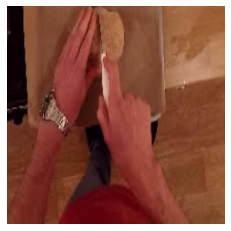

In [98]:
img_show = ImgToNumpy()(img.cpu())[0]
fig, ax = plt.subplots()
ax.imshow(img_show)
plt.axis('off')
plt.show()

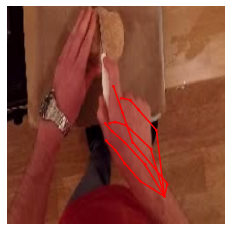

In [99]:
model.detect(img)

In [70]:
# img1 = cv2.resize(img_show, (img_rsz//2, img_rsz//2))
# sample = {'img': img1}
# img1 = ImgToTorch()(sample)['img']
# img1 = img1.unsqueeze(0).cuda()

# img2 = cv2.resize(img_show, (img_rsz//4, img_rsz//4))
# sample = {'img': img2}
# img2 = ImgToTorch()(sample)['img']
# img2 = img2.unsqueeze(0).cuda()

# img_list = [img, img1, img2]

In [58]:
# model.detect(img_list)